#1. Mount Drive

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
!ls -al '/gdrive/My Drive/data'

total 2199524
-rw------- 1 root root    337847 Feb  2 11:56 data_202001.csv
-rw------- 1 root root    314682 Feb  2 10:30 data_202002.csv
-rw------- 1 root root    335953 Feb  2 10:35 data_202003.csv
-rw------- 1 root root   4052564 Feb  2 12:48 data_2020_1_12.csv
-rw------- 1 root root    988308 Feb  2 11:58 data_2020.csv
-rw------- 1 root root    530660 Feb 18 12:59 data_2020_ml.csv
-rw------- 1 root root   9453240 Aug  7  2019 marathon_2015_2017.csv
-rw------- 1 root root   1750754 Feb 22 17:41 marathon_2015_2017_qualifying.csv
-rw------- 1 root root      1349 Aug 19  2019 marathon_qualifying_time.csv
-rw------- 1 root root   4228123 Apr 29  2017 marathon_results_2015.csv
-rw------- 1 root root   4244383 Apr 29  2017 marathon_results_2016.csv
-rw------- 1 root root   4196246 Apr 29  2017 marathon_results_2017.csv
-rw------- 1 root root 783889122 Jan 30 17:16 TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Jan 31 06:59 TCS_영업소간통행시간_1시가

#2. Korean Characters

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,796 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 149406 files and d

런타임 - 런타임 다시 시작

matplotlib의 폰트를 Nanum 폰트로 지정

In [6]:
import matplotlib.pyplot as plt


In [3]:
plt.rc('font', family='NanumBarunGothic')

#3. Load Data

In [4]:
import pandas as pd


In [5]:
# Load a file under "data" folder
file = "/gdrive/My Drive/data/data_2020_1_12.csv"
data = pd.read_csv(file)

In [7]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [8]:
#101,서울 105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 140,부산
#101,서울(406.94) 105,기흥(387.19) 110,목천(329.91) 115,대전(271.94) 120,황간(222.38) 125,남구미(167.25) 130,동김천(192.00) 135,경주(68.26) 140,부산(0)
# Distance from Seoul : 0, 19.75, 77.03, 135, 184.56, 214.94, 239.69, 338.68, 406.94
# Distance from Seoul : 0, 20, 77, 135, 185, 240, 215, 339, 407
data['도착영업소코드'] = data['도착영업소코드'].map({105: 20, 110: 77, 115: 135, 120: 185, 125: 240, 130: 215, 135: 339, 140: 407})

In [9]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2


In [10]:
data.rename(columns={'도착영업소코드': '거리'}, inplace=True)

In [11]:
data.head()

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2


In [12]:
data_destination = data[data['거리'].isin([407])]

In [13]:
data_destination

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
292,20200101,6,101,407,15824,2
293,20200101,6,101,407,19623,2
294,20200101,9,101,407,18048,2
295,20200101,17,101,407,17979,2
296,20200101,11,101,407,17349,2
...,...,...,...,...,...,...
152713,20201231,9,101,407,14460,3
152856,20201231,16,101,407,14947,3
152857,20201231,17,101,407,15328,3
152861,20201231,20,101,407,17001,3


In [14]:
data_time = data_destination.groupby(['집계시','요일','거리'])['통행시간'].mean()

In [15]:
data_time

집계시  요일  거리 
0    0   407    15549.675676
     1   407    15983.102564
     2   407    15129.750000
     3   407    14533.189189
     4   407    15908.275000
                    ...     
23   2   407    16006.125000
     3   407    16118.288889
     4   407    17035.450980
     5   407    16033.622222
     6   407    15297.022727
Name: 통행시간, Length: 168, dtype: float64

In [16]:
data_distance = data_time.unstack(level=-1)

In [17]:
data_distance

거리               407
집계시 요일              
0   0   15549.675676
    1   15983.102564
    2   15129.750000
    3   14533.189189
    4   15908.275000
...              ...
23  2   16006.125000
    3   16118.288889
    4   17035.450980
    5   16033.622222
    6   15297.022727

[168 rows x 1 columns]

In [18]:
data_distance.dropna()

거리               407
집계시 요일              
0   0   15549.675676
    1   15983.102564
    2   15129.750000
    3   14533.189189
    4   15908.275000
...              ...
23  2   16006.125000
    3   16118.288889
    4   17035.450980
    5   16033.622222
    6   15297.022727

[168 rows x 1 columns]

In [19]:
data_out = data_distance.reset_index()

In [20]:
data_out

거리,집계시,요일,407
0,0,0,15549.675676
1,0,1,15983.102564
2,0,2,15129.750000
3,0,3,14533.189189
4,0,4,15908.275000
...,...,...,...
163,23,2,16006.125000
164,23,3,16118.288889
165,23,4,17035.450980
166,23,5,16033.622222


In [21]:
stat = data_out.describe()
print(stat)

거리            집계시          요일           407
count  168.000000  168.000000    168.000000
mean    11.500000    3.000000  15781.256504
std      6.942881    2.005979    649.799175
min      0.000000    0.000000  14232.461538
25%      5.750000    1.000000  15272.221805
50%     11.500000    3.000000  15838.602578
75%     17.250000    5.000000  16113.439869
max     23.000000    6.000000  17630.525424


In [22]:
value_25 = stat[407][4]
value_75 = stat[407][6]
print(value_25, value_75)

15272.221805317326 16113.439869281046


In [23]:
data_out['Grade'] = 0

In [24]:
data_out

거리,집계시,요일,407,Grade
0,0,0,15549.675676,0
1,0,1,15983.102564,0
2,0,2,15129.750000,0
3,0,3,14533.189189,0
4,0,4,15908.275000,0
...,...,...,...,...
163,23,2,16006.125000,0
164,23,3,16118.288889,0
165,23,4,17035.450980,0
166,23,5,16033.622222,0


In [25]:
def get_grade(input):
    if input > value_25:
        if input > value_75:
            output = 2
        else:
            output = 1
    else:
        output = 0
    return output

In [26]:
data_grade = pd.DataFrame(columns=['time', 'day', 'grade'])

In [27]:
data_grade

,time,day,grade


In [28]:
for index, item in data_out.iterrows():
    print(index, item['집계시'], item['요일'])
    data_grade = data_grade.append({
        'time': item['집계시'],
        'day': item['요일'],
        'grade': get_grade(item[407])
    }, ignore_index=True)

0 0.0 0.0
1 0.0 1.0
2 0.0 2.0
3 0.0 3.0
4 0.0 4.0
5 0.0 5.0
6 0.0 6.0
7 1.0 0.0
8 1.0 1.0
9 1.0 2.0
10 1.0 3.0
11 1.0 4.0
12 1.0 5.0
13 1.0 6.0
14 2.0 0.0
15 2.0 1.0
16 2.0 2.0
17 2.0 3.0
18 2.0 4.0
19 2.0 5.0
20 2.0 6.0
21 3.0 0.0
22 3.0 1.0
23 3.0 2.0
24 3.0 3.0
25 3.0 4.0
26 3.0 5.0
27 3.0 6.0
28 4.0 0.0
29 4.0 1.0
30 4.0 2.0
31 4.0 3.0
32 4.0 4.0
33 4.0 5.0
34 4.0 6.0
35 5.0 0.0
36 5.0 1.0
37 5.0 2.0
38 5.0 3.0
39 5.0 4.0
40 5.0 5.0
41 5.0 6.0
42 6.0 0.0
43 6.0 1.0
44 6.0 2.0
45 6.0 3.0
46 6.0 4.0
47 6.0 5.0
48 6.0 6.0
49 7.0 0.0
50 7.0 1.0
51 7.0 2.0
52 7.0 3.0
53 7.0 4.0
54 7.0 5.0
55 7.0 6.0
56 8.0 0.0
57 8.0 1.0
58 8.0 2.0
59 8.0 3.0
60 8.0 4.0
61 8.0 5.0
62 8.0 6.0
63 9.0 0.0
64 9.0 1.0
65 9.0 2.0
66 9.0 3.0
67 9.0 4.0
68 9.0 5.0
69 9.0 6.0
70 10.0 0.0
71 10.0 1.0
72 10.0 2.0
73 10.0 3.0
74 10.0 4.0
75 10.0 5.0
76 10.0 6.0
77 11.0 0.0
78 11.0 1.0
79 11.0 2.0
80 11.0 3.0
81 11.0 4.0
82 11.0 5.0
83 11.0 6.0
84 12.0 0.0
85 12.0 1.0
86 12.0 2.0
87 12.0 3.0
88 12.0 4.0
89 12.0 5.0


In [29]:
data_grade

,time,day,grade
0,0.0,0.0,1.0
1,0.0,1.0,1.0
2,0.0,2.0,0.0
3,0.0,3.0,0.0
4,0.0,4.0,1.0
...,...,...,...
163,23.0,2.0,1.0
164,23.0,3.0,2.0
165,23.0,4.0,2.0
166,23.0,5.0,1.0


In [30]:
# Dataframe to List
data_list = data_grade.values.tolist()

In [31]:
# Generate train dataset
x_train = [ r[:2] for r in data_list ]
y_train = [ [r[-1]] for r in data_list ]

In [32]:
import tensorflow as tf
# One hot encode [0, 1, 2] to [[1,0,0], [0,1,0], [0,0,1]]
y_one_hot = tf.keras.utils.to_categorical(y_train)

In [33]:
print(x_train[:3], y_train[:3], y_one_hot[:3])

[[0.0, 0.0], [0.0, 1.0], [0.0, 2.0]] [[1.0], [1.0], [0.0]] [[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


#4. Multinomial Classification using Tensorflow

In [104]:
learning_rate = 1e-2
learning_epochs = 1000

In [105]:
# Stochastic gradient descent (SGD) Optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(3, input_shape=(2,), activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [106]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [107]:
import numpy as np

history = model.fit(np.array(x_train), np.array(y_one_hot), epochs=learning_epochs)

Epoch 1/1000
6/6 [==============================] - 0s 2ms/step - loss: 2.4618 - accuracy: 0.4454
Epoch 2/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.6591 - accuracy: 0.3577
Epoch 3/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.5940 - accuracy: 0.3339
Epoch 4/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3507 - accuracy: 0.3966
Epoch 5/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3565 - accuracy: 0.4344
Epoch 6/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.2637 - accuracy: 0.4281
Epoch 7/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3311 - accuracy: 0.4396
Epoch 8/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.2017 - accuracy: 0.4259
Epoch 9/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.1514 - accuracy: 0.4406
Epoch 10/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.0447 - accuracy: 0.4825
Epoch 11/1000
6/6 [

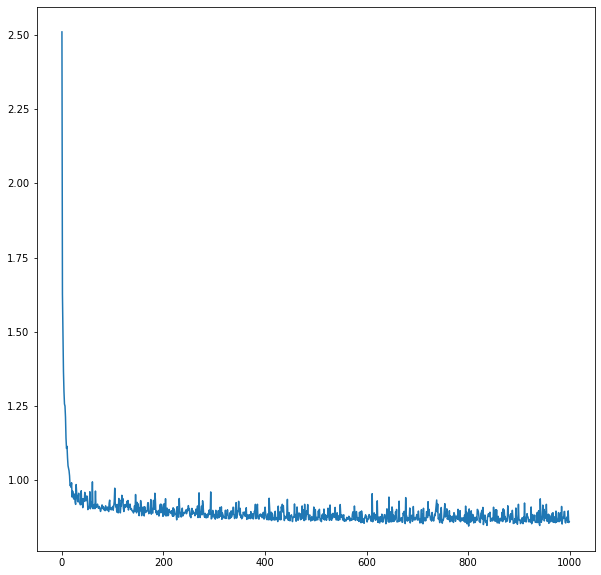

In [109]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.show()

In [110]:
print("%20s %20s %20s" % ('학습량', '비용', '정확도')+'\n')
for step in range(learning_epochs):
    if step % 100 == 0:
        cost_val = history.history['loss'][step]
        acc_val = history.history['accuracy'][step]
        print("%20i %20.5f %20.5f" % (step, cost_val, acc_val))

                 학습량                   비용                  정확도

                   0              2.51101              0.41071
                 100              0.91105              0.50000
                 200              0.88874              0.51786
                 300              0.87329              0.48810
                 400              0.90834              0.52976
                 500              0.86990              0.51786
                 600              0.87700              0.51190
                 700              0.87293              0.52381
                 800              0.88577              0.52976
                 900              0.86571              0.52381


In [111]:
Time = 14 #@param {type:"slider", min:0, max:23, step:1}
Day = 3 #@param {type:"slider", min:0, max:6, step:1}

In [112]:
time_condition = data_out['집계시'] == Time
day_condition = data_out['요일'] == Day
data_out[time_condition & day_condition]

거리,집계시,요일,407,Grade
101,14,3,15936.189655,0


In [113]:
input = [Time, Day]
result = model.predict(np.array([input]))

grade_list = ['빠름', '보통', '느림']
grade_index = np.argmax(result[0])
grade = grade_list[grade_index]
print("%30s" % ('속도 등급')+'\n')
print("%30s" % (grade)+'\n')
print(result[0], grade_index)

                         속도 등급

                            보통

[0.1052731  0.7079346  0.18679234] 1
